In [3]:
import pandas as pd
import numpy as np
import ast
from utils import load_bash_config
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
config = load_bash_config('script_constants.sh') #Dont detect all the variables
### MANUAL CONFIGURATION
path_exp = "data/solutions/ntw_722_050-050-025_C/obj_distance-occ_variance-pw_consumption/Replicas050/Genetics/hybrid_NSGA2-NSGA3/"
file = "{algorithm}_1_100-100_SV0-CV2-MV1_MM0.2-MC0.1-MB0.1.txt"

path_exp = "data/solutions/ntw_722_050-050-025_C/obj_distance-occ_variance-pw_consumption/Replicas050/Genetics/hybrid_NSGA2-NSGA3-UNSGA3-SMSEMOA/"
file = "{algorithm}_1_100-100_SV0-CV2-MV1_MM0.2-MC0.1-MB0.1.txt"


path_exp = "results_hybrid_400_500/hybridization/"
file = "{algorithm}_1_400-500_SV0-CV2-MV1_MM0.2-MC0.1-MB0.1.txt"


In [8]:
# TEST SOME CONFIGS
print(config['HYBRID_ALGORITHMS'])
print(config['HYBRID_GEN_STEPS']) 
print(config['HYBRID_N_GEN']) 
print(config['HYBRID_POP_SIZE'])
# print(config['MYHYBRID_SOL_DUMPING'])
print(config['OBJECTIVES'])
print(file.format(algorithm=config['HYBRID_ALGORITHMS'][0]))

#check if results file exists
import os
if os.path.exists(path_exp + file.format(algorithm=config['HYBRID_ALGORITHMS'][0])):
    print("File exists")
else:
    print("File does not exist")
    
    

['NSGA2', 'NSGA3', 'UNSGA3', 'SMSEMOA']
[100, 200, 300, 400]
500
400
['distance', 'occ_variance', 'pw_consumption']
NSGA2_1_400-500_SV0-CV2-MV1_MM0.2-MC0.1-MB0.1.txt
File exists


In [9]:
# col_dumps = np.array(ast.literal_eval(config['HYBRID_GEN_STEPS'])).ravel()
col_dumps = config['HYBRID_GEN_STEPS']
n_alg = len(config['HYBRID_ALGORITHMS'])
n_dumps = np.repeat(col_dumps,len(config['HYBRID_ALGORITHMS']))
print(n_dumps)
print(len(n_dumps))
n_dumps== len(config['HYBRID_GEN_STEPS'])*len(config['HYBRID_ALGORITHMS'])

pairs = []
for i,n in enumerate(n_dumps):
    ixa = i%n_alg
    pairs.extend([f'A{ixa}_{n}'])
    # for i in range(len(col_dumps)):
    #     pairs.extend([f'D{n}{i}'])

columns = ["algorithm", "date", "time", "isPF", "Generation"] 
columns += [f"O{i+1}" for i,_ in enumerate(config['OBJECTIVES'])]
t = len(columns)
columns += pairs

print(columns)

[100 100 100 100 200 200 200 200 300 300 300 300 400 400 400 400]
16
['algorithm', 'date', 'time', 'isPF', 'Generation', 'O1', 'O2', 'O3', 'A0_100', 'A1_100', 'A2_100', 'A3_100', 'A0_200', 'A1_200', 'A2_200', 'A3_200', 'A0_300', 'A1_300', 'A2_300', 'A3_300', 'A0_400', 'A1_400', 'A2_400', 'A3_400']


In [10]:
df = pd.DataFrame()
for algorithm in config['HYBRID_ALGORITHMS']:
    dft = pd.read_csv(path_exp + file.format(algorithm=algorithm),sep=" ",header=None)
    dft.drop(columns=[len(dft.columns)-1],inplace=True)
    dft.insert(loc=0, column='algorithm', value=algorithm)
    df = pd.concat([df,dft])

df.columns = columns
df.head()








,algorithm,date,time,isPF,Generation,O1,O2,O3,A0_100,A1_100,...,A2_200,A3_200,A0_300,A1_300,A2_300,A3_300,A0_400,A1_400,A2_400,A3_400
0,NSGA2,2025-06-23,09:56:50.217750,1,1,0.551515,0.195914,0.254080,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,NSGA2,2025-06-23,09:56:50.217750,1,1,0.543562,0.214814,0.281028,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,NSGA2,2025-06-23,09:56:50.217750,1,1,0.610717,0.252414,0.235237,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NSGA2,2025-06-23,09:56:50.217750,1,1,0.546469,0.318650,0.251000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NSGA2,2025-06-23,09:56:50.217750,1,1,0.604673,0.183406,0.250877,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
df.tail()

,algorithm,date,time,isPF,Generation,O1,O2,O3,A0_100,A1_100,...,A2_200,A3_200,A0_300,A1_300,A2_300,A3_300,A0_400,A1_400,A2_400,A3_400
199995,SMSEMOA,2025-06-23,23:31:19.910579,1,500,0.278436,0.064374,0.211428,0.002804,0.458968,...,0.142429,0.123569,0.008005,0.611391,0.270250,0.110354,0.0,0.578125,0.416016,0.005859
199996,SMSEMOA,2025-06-23,23:31:19.910579,1,500,0.275732,0.064027,0.233631,0.004471,0.462954,...,0.143700,0.133821,0.006898,0.591140,0.276509,0.125453,0.0,0.851562,0.124023,0.024414
199997,SMSEMOA,2025-06-23,23:31:19.910579,1,500,0.272335,0.077388,0.174216,0.002705,0.458125,...,0.142839,0.121735,0.003534,0.618945,0.286852,0.090669,0.0,0.921875,0.072266,0.005859
199998,SMSEMOA,2025-06-23,23:31:19.910579,1,500,0.282574,0.053675,0.269403,0.006189,0.466110,...,0.141220,0.143271,0.011424,0.600067,0.253319,0.135191,0.0,0.693359,0.288574,0.018066
199999,SMSEMOA,2025-06-23,23:31:19.910579,1,500,0.315263,0.039659,0.288699,0.017802,0.462405,...,0.140646,0.145842,0.026755,0.586140,0.228987,0.158117,0.0,0.527344,0.428223,0.044434


In [12]:
# df = df[df.isPF==1]
df.shape

(800000, 24)

/Users/isaac/Projects/GeneticHybridizationPlacement/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


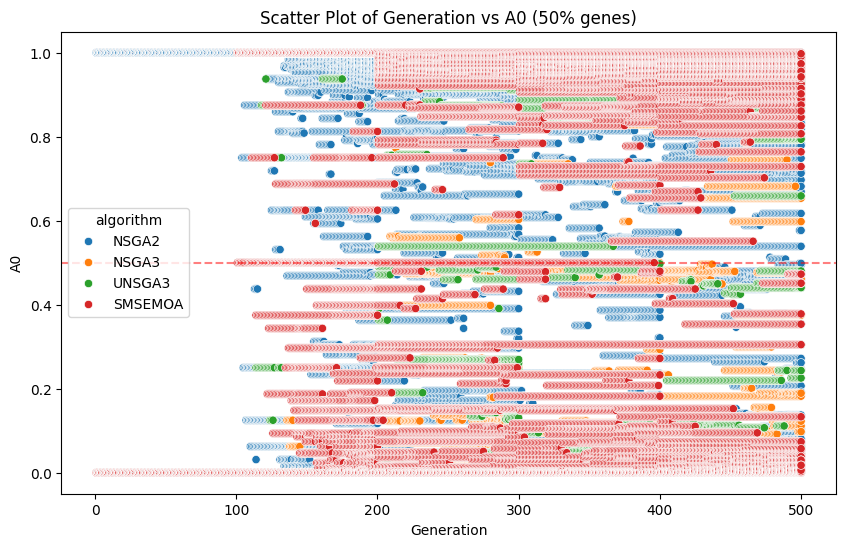

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Generation', y='A0_100',hue='algorithm')

plt.title('Scatter Plot of Generation vs A0 (50% genes)')
plt.xlabel('Generation')
plt.ylabel('A0')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # Add horizontal line at y=0.5
plt.show()

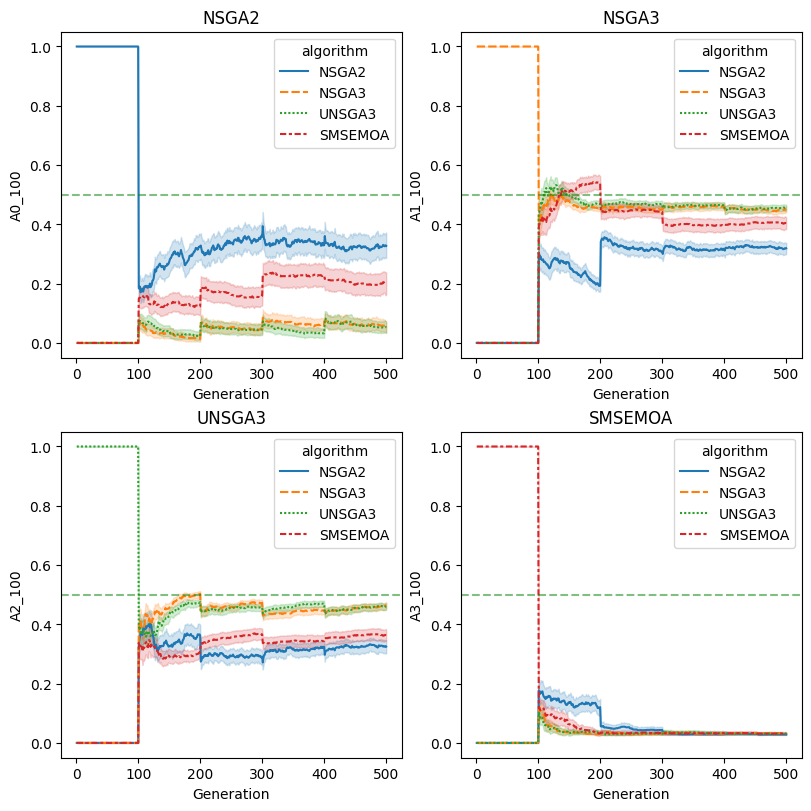

In [15]:
ig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8),
                        layout="constrained")

for ixa,algorithm in enumerate(config['HYBRID_ALGORITHMS']):
    axt = axs[ixa//2,ixa%2]
    axt.set_title(algorithm)
    sns.lineplot(x="Generation", y=f"A{ixa}_100",
             hue="algorithm", style="algorithm",
             data=df,ax=axt)
    axt.axhline(y=0.5, color='green', linestyle='--', alpha=0.5)  # Add horizontal line at y=0.5

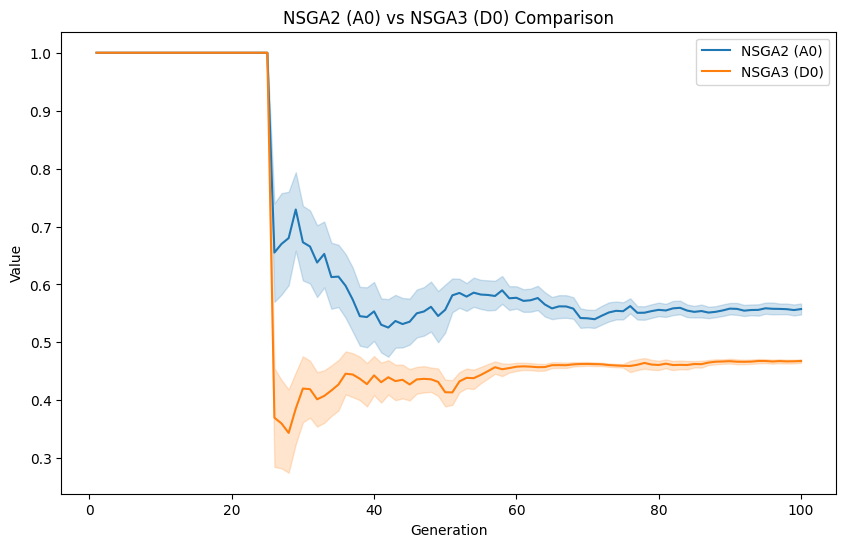

In [100]:
plt.figure(figsize=(10, 6))

# Plot NSGA2 with A0
nsga2_data = df[df['algorithm'] == 'NSGA2']
sns.lineplot(x="Generation", y="A0",
             data=nsga2_data, label='NSGA2 (A0)')

# Plot NSGA3 with D0
nsga3_data = df[df['algorithm'] == 'NSGA3']
sns.lineplot(x="Generation", y="D0",
             data=nsga3_data, label='NSGA3 (D0)')

plt.title('NSGA2 (A0) vs NSGA3 (D0) Comparison')
plt.xlabel('Generation')
plt.ylabel('Value')
plt.legend()
plt.show()

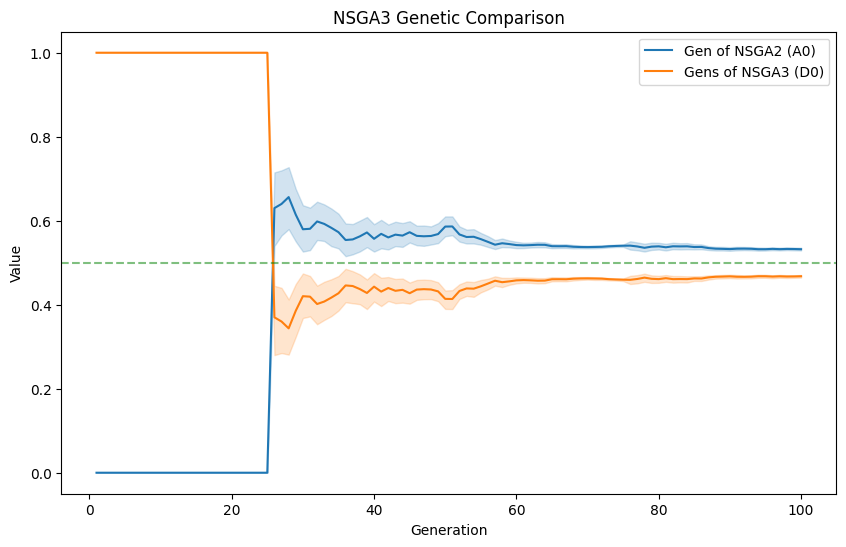

In [110]:
plt.figure(figsize=(10, 6))

# Plot NSGA2 with A0
nsga2_data = df[df['algorithm'] == 'NSGA3']
# nsga2_data = df[df['A0'] >0 ]
sns.lineplot(x="Generation", y="A0",
             data=nsga2_data, label='Gen of NSGA2 (A0)')

# Plot NSGA3 with D0
nsga3_data = df[df['algorithm'] == 'NSGA3']
sns.lineplot(x="Generation", y="D0",
             data=nsga3_data, label='Gens of NSGA3 (D0)')
plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.5)  
plt.title('NSGA3 Genetic Comparison')
plt.xlabel('Generation')
plt.ylabel('Value')
plt.legend()
plt.show()

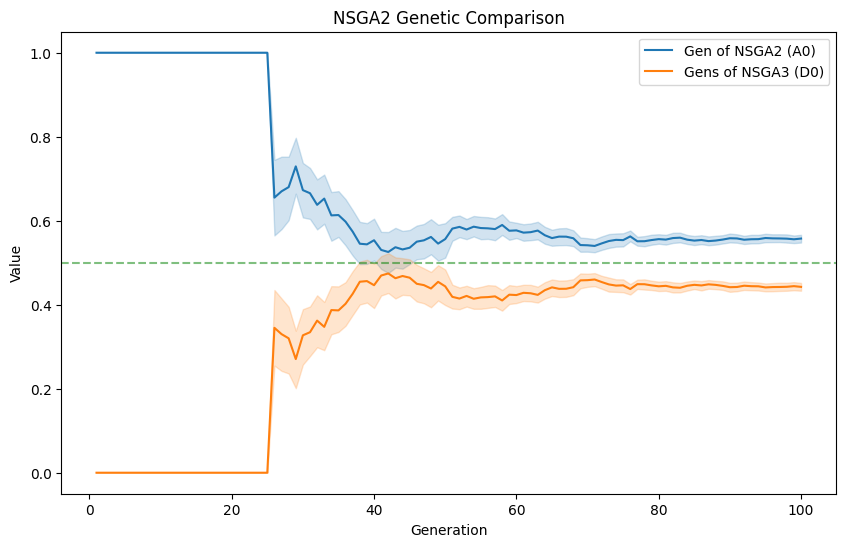

In [111]:
plt.figure(figsize=(10, 6))

# Plot NSGA2 with A0
nsga2_data = df[df['algorithm'] == 'NSGA2']
# nsga2_data = df[df['A0'] >0 ]
sns.lineplot(x="Generation", y="A0",
             data=nsga2_data, label='Gen of NSGA2 (A0)')

# Plot NSGA3 with D0
nsga3_data = df[df['algorithm'] == 'NSGA2']
sns.lineplot(x="Generation", y="D0",
             data=nsga3_data, label='Gens of NSGA3 (D0)')
plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.5)  
plt.title('NSGA2 Genetic Comparison')
plt.xlabel('Generation')
plt.ylabel('Value')
plt.legend()
plt.show()

## second mejor intento 



In [16]:
filter = ["A0_25","A1_25","A2_25","A3_25"]
filter = ["A0_100","A1_100","A2_100","A3_100"]
rename_filter = dict(zip(filter,config['HYBRID_ALGORITHMS']))
filter.append("Generation")
print(filter)

['A0_100', 'A1_100', 'A2_100', 'A3_100', 'Generation']


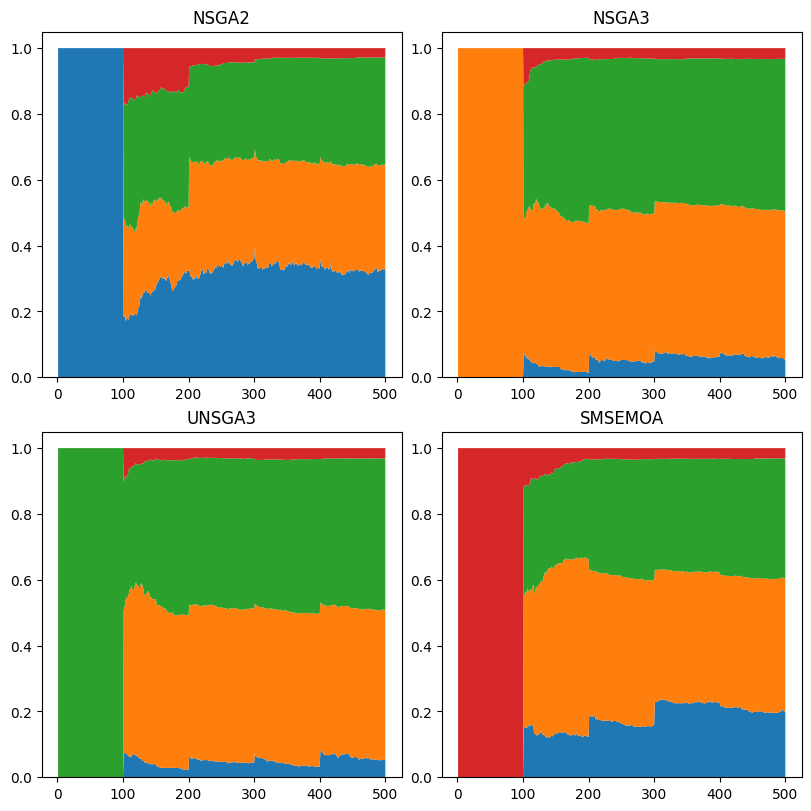

In [17]:
ig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8),
                        layout="constrained")

for ixa,algorithm in enumerate(config['HYBRID_ALGORITHMS']):
    axt = axs[ixa//2,ixa%2]
    axt.set_title(algorithm)

    dt = df[df['algorithm'] == algorithm].loc[:,filter]
    dt.rename(columns=rename_filter,inplace=True)

    dg = dt.groupby("Generation").mean().reset_index()
    dg.set_index('Generation', inplace=True)
    # Create stacked area plot
    axt.stackplot(dg.index, dg.T, labels=dg.columns)



         NSGA2     NSGA3  UNSGA3   SMSEMOA
2400  1.000000  0.000000     0.0  0.000000
2401  1.000000  0.000000     0.0  0.000000
2402  1.000000  0.000000     0.0  0.000000
2403  1.000000  0.000000     0.0  0.000000
2404  1.000000  0.000000     0.0  0.000000
...        ...       ...     ...       ...
4995  0.757812  0.208008     0.0  0.034180
4996  0.875000  0.078125     0.0  0.046875
4997  0.545654  0.385010     0.0  0.069336
4998  0.372879  0.550858     0.0  0.076263
4999  0.406738  0.540527     0.0  0.052734

[2600 rows x 4 columns]


<Axes: >

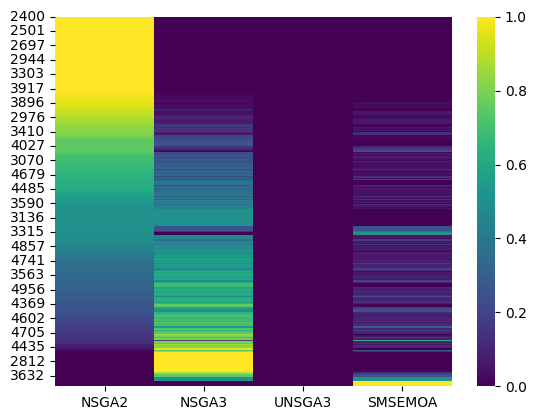

In [223]:
filter_cols = ["A0_25", "A1_25", "A2_25", "A3_25"]
rename_filter = dict(zip(filter_cols, config['HYBRID_ALGORITHMS']))


# Define generation ranges for averaging
gen_ranges = [(1, 25),(26,26), (25, 50), (50, 75), (75, 100), (100, 100)]
gen_labels = ['1-25', '26-26','25-50', '50-75', '75-100', '100']

algorithm = "NSGA2"
dt = df[df['algorithm'] == algorithm].loc[:, filter_cols + ['Generation']]

dt.rename(columns=rename_filter, inplace=True)

mask = (dt['Generation'] >= 25) & (dt['Generation'] <= 50)
range_data = dt[mask].copy()
range_data = range_data.iloc[:,:-1] #Remove Generation column
            
print(range_data)
data_T_sorted = range_data.sort_values(by=list(range_data.columns), ascending=False)
sns.heatmap(data_T_sorted, cmap="viridis", cbar=True, annot=False)
